In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#No. of rows and columns
df.shape

(1000, 8)

In [5]:
#checking for null values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
#checking fully duplicated rows
df.duplicated().sum()

0

In [7]:
##checking datatypes of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#number of each unique value in each feature/column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
#some statistics for our numerical features/data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploring Data

In [10]:
print("categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable:    ",end=" ")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:    ",end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:     ['female' 'male']
categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:     ['standard' 'free/reduced']
categories in 'test preparation course' variable:     ['none' 'completed']


In [11]:
#define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
# Adding columns for "Total Score" which will be our output feature and "Average"

Total_Score = df['math score'] + df['reading score'] + df['writing score']
df['Total Score'] = Total_Score
df['Average'] = df['Total Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading score'] == 100]['Average'].count()  # Count rows directly
writing_full = df[df['writing score'] == 100]['Average'].count() # Count rows directly
math_full = df[df['math score'] == 100]['Average'].count()       # Count rows directly

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = df[df['reading score'] <=20]['Average'].count()  # Count rows directly
writing_less_20 = df[df['writing score'] <=20]['Average'].count() # Count rows directly
math_less_20 = df[df['math score'] <=20]['Average'].count()

print(f'Number of students with less than or equal to 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than or equal to 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than or equal to 20 marks in Reading: {reading_less_20}')

Number of students with less than or equal to 20 marks in Maths: 4
Number of students with less than or equal to 20 marks in Writing: 3
Number of students with less than or equal to 20 marks in Reading: 1


# Insights
1- From above values we get students have performed the worst im maths


2-Best performance is in reading section

# Visulaization

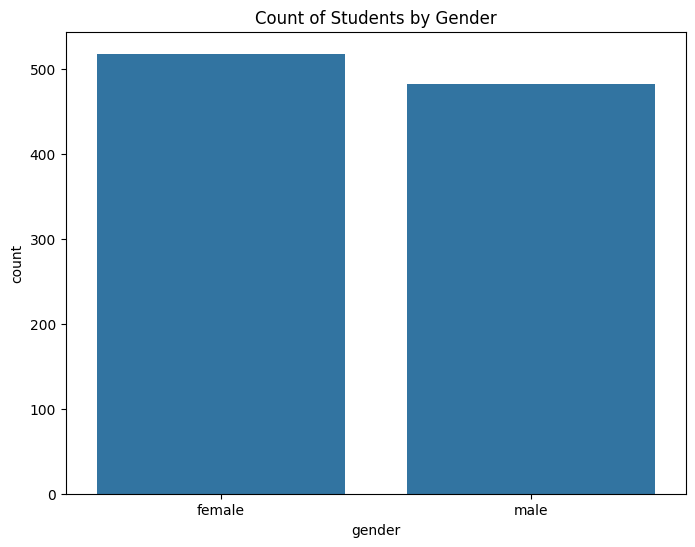

In [15]:
# Count Plot for Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Count of Students by Gender')
plt.show()


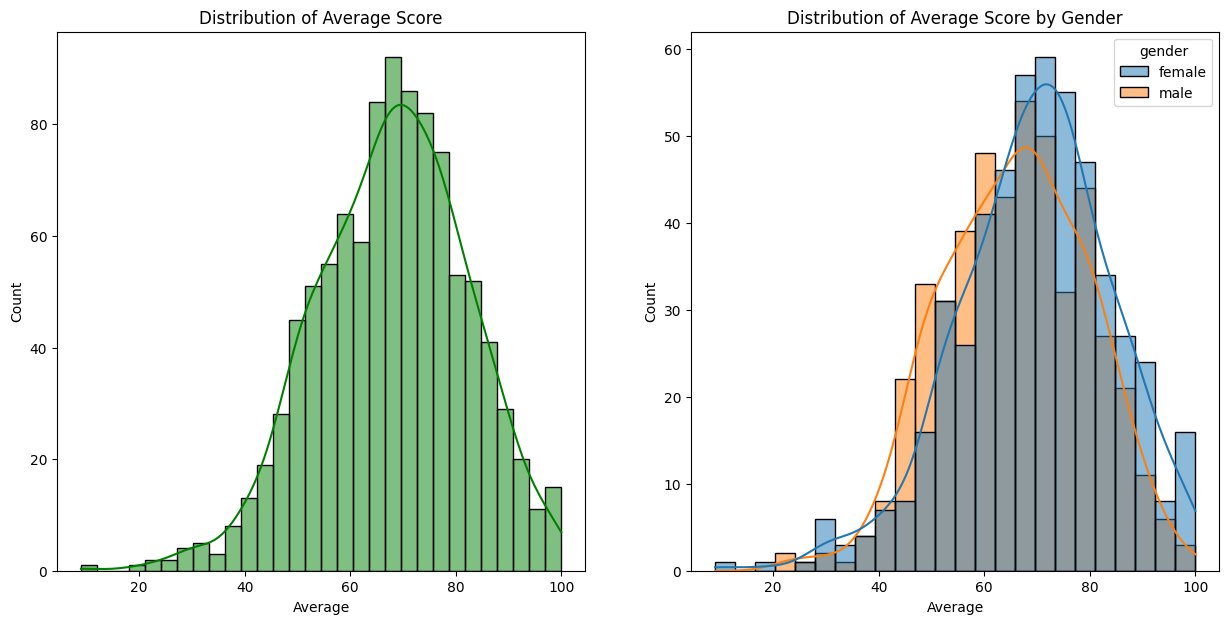

In [16]:
# Histogram and KDE Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.title('Distribution of Average Score')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Average', kde=True, hue='gender')
plt.title('Distribution of Average Score by Gender')

plt.show()


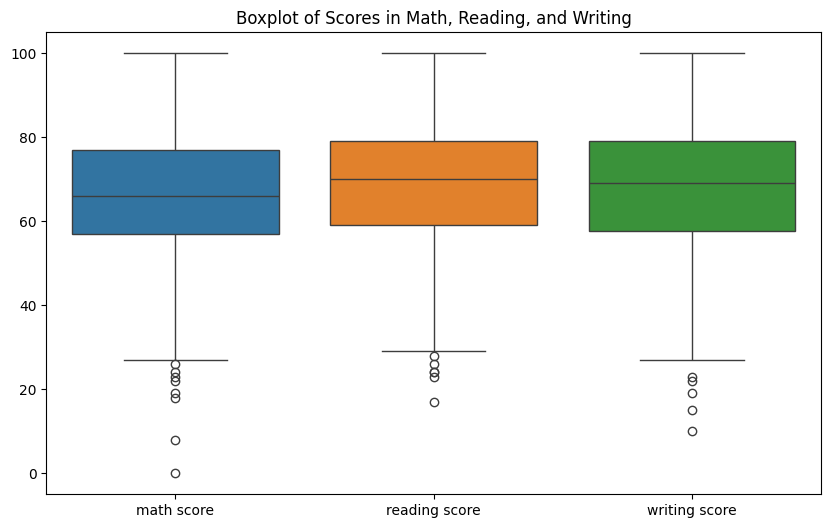

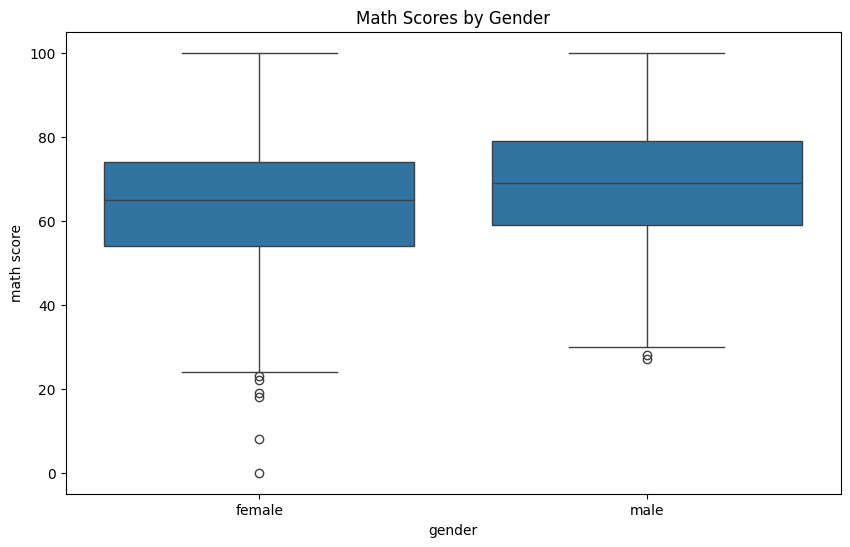

In [17]:
# Boxplot to visualize scores by subject
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title('Boxplot of Scores in Math, Reading, and Writing')
plt.show()

# Boxplot for Scores by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Scores by Gender')
plt.show()


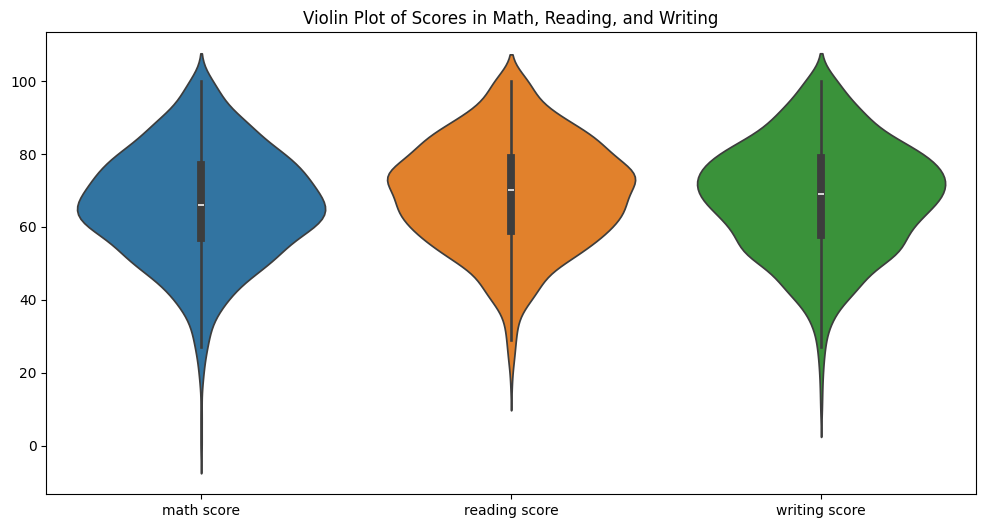

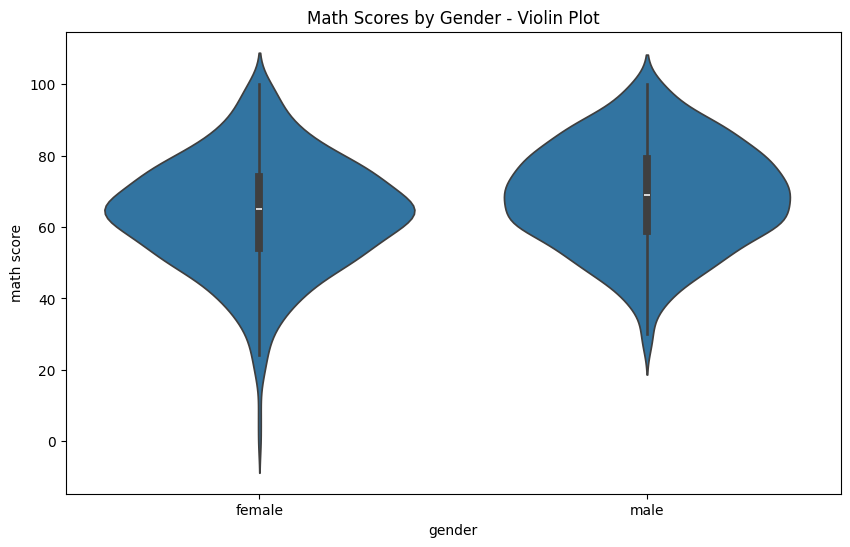

In [18]:
# Violin plot for scores in different subjects
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['math score', 'reading score', 'writing score']])
plt.title('Violin Plot of Scores in Math, Reading, and Writing')
plt.show()

# Violin plot by Gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='math score', data=df)
plt.title('Math Scores by Gender - Violin Plot')
plt.show()


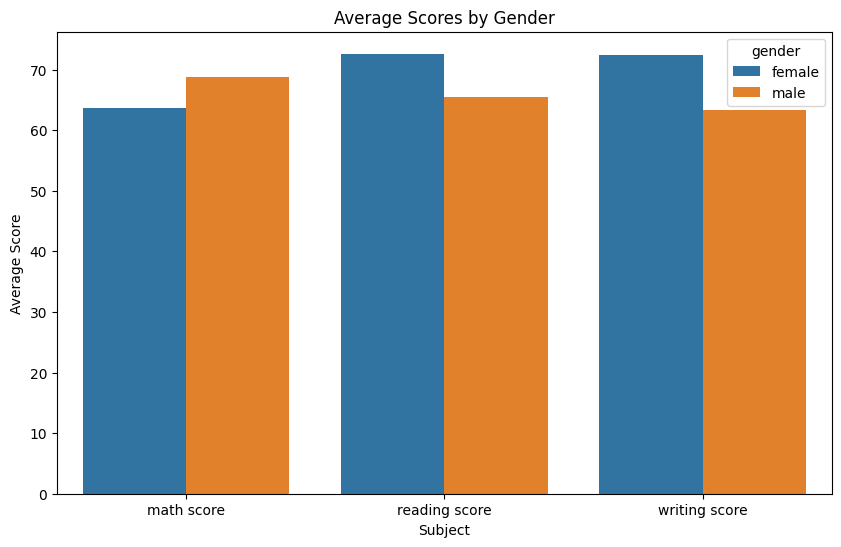

In [19]:
# Bar Plot for Average Scores by Gender
df_gender_avg = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()
df_gender_avg_melted = df_gender_avg.melt(id_vars='gender', var_name='Subject', value_name='Average Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_gender_avg_melted, x='Subject', y='Average Score', hue='gender')
plt.title('Average Scores by Gender')
plt.show()


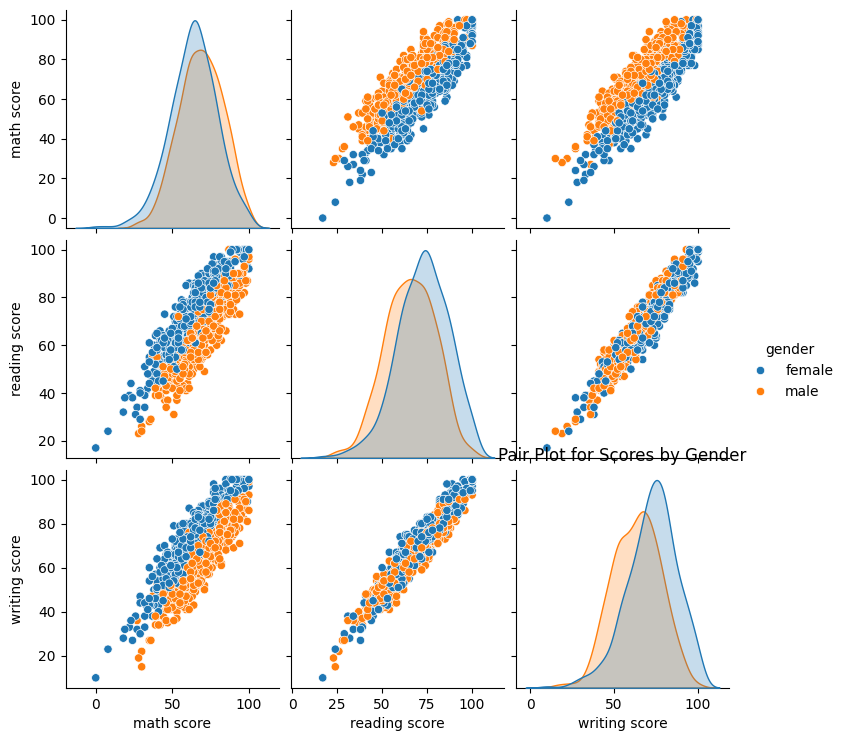

In [20]:
# Pair Plot for Scores and Gender
sns.pairplot(df[['math score', 'reading score', 'writing score', 'gender']], hue='gender')
plt.title('Pair Plot for Scores by Gender')
plt.show()


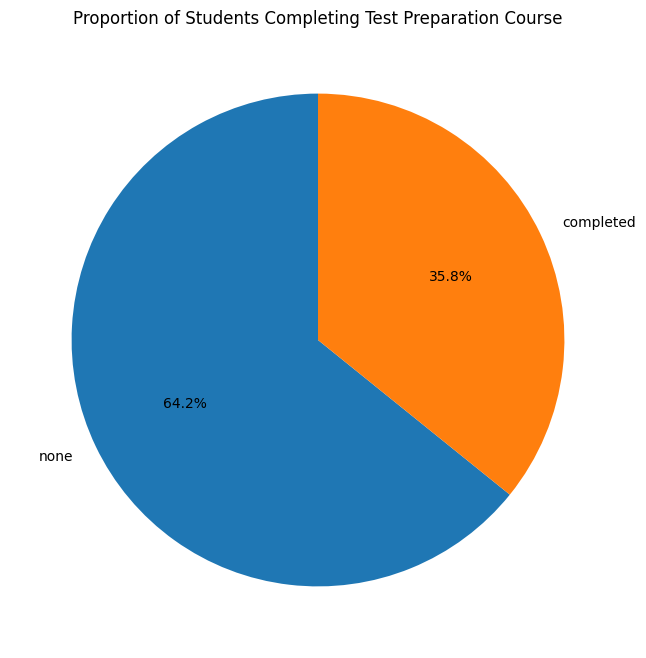

In [21]:
# Pie Chart for Test Preparation Course Completion
test_prep_counts = df['test preparation course'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(test_prep_counts, labels=test_prep_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Students Completing Test Preparation Course')
plt.show()


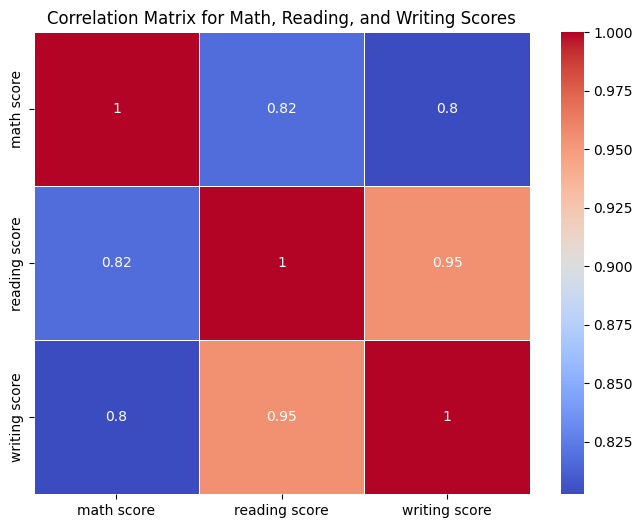

In [22]:
# Heatmap for Correlation between Scores
plt.figure(figsize=(8, 6))
corr_matrix = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Math, Reading, and Writing Scores')
plt.show()


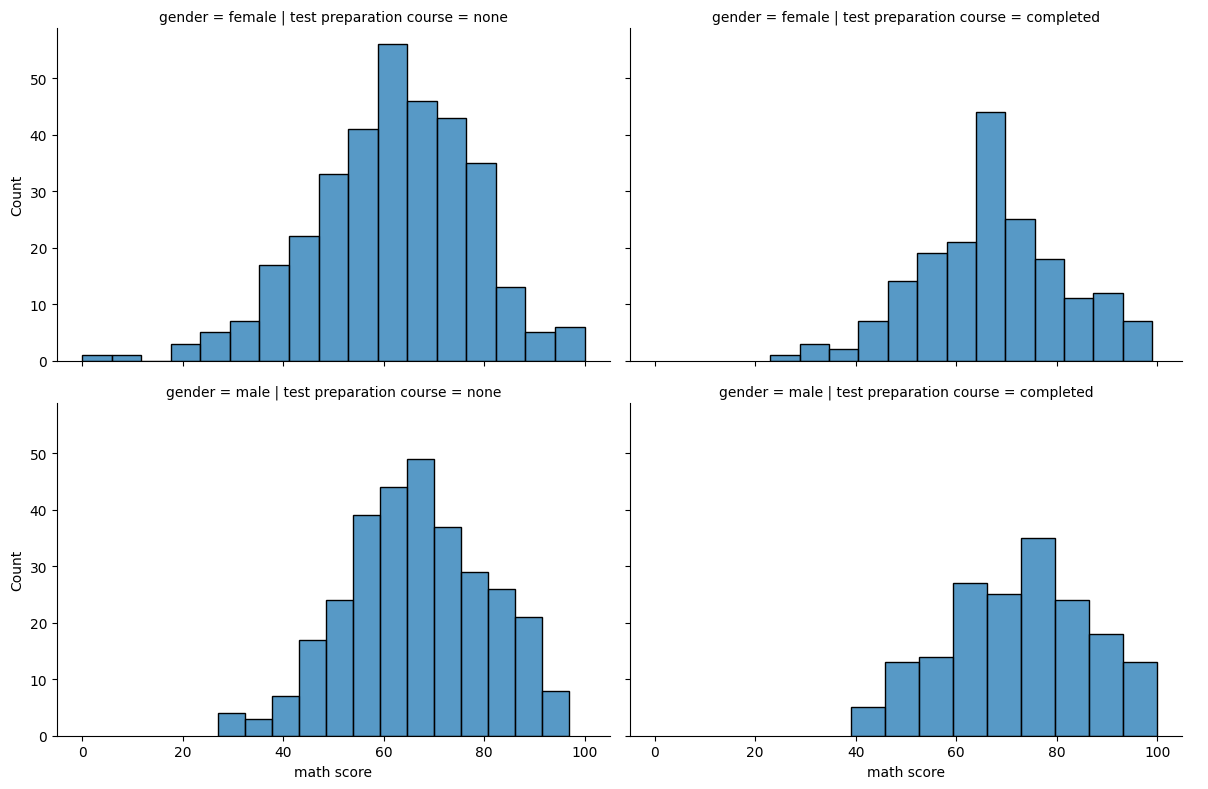

In [23]:
# FacetGrid to visualize distributions of math scores by test preparation course and gender
g = sns.FacetGrid(df, col="test preparation course", row="gender", height=4, aspect=1.5)
g.map(sns.histplot, "math score")
g.add_legend()
plt.show()
